# Lead Score Case study
Problem Statement 

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Importing the Data

In [5]:
## Calling the libraries
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# To increase the display size for rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [7]:
#reading the Leads csv file
df = pd.read_csv('Leads.csv')

In [8]:
# reading the first 5 rows
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# shape of the data frame
df.shape

(9240, 37)

In [10]:
# info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [11]:
#stastical information of the data frame
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [12]:
## checking the object columns
ob=df.select_dtypes(include=["object"]).columns
ob

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
#Replacing the select with null values for all columns
df = df.replace({'Select':np.nan})


In [ ]:
null_perc = pd.DataFrame(round((lead.isnull().sum())*100/lead.shape[0],2)).reset_index()
null_perc.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(lead.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'Null Values']
null_lead = pd.merge(null_value, null_perc, on='Column Name')
null_lead.sort_values("Null Values", ascending = False)

In [14]:
# chekcing the percentage of missing values at column level
df.isnull().sum()/len(df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [15]:
## removing columns greater than 45% null values
null_column =round((df.isnull().sum()/len(df))*100,4) 
null_column_45 = null_column[null_column.values > 45.0000]
null_column_45 = list(null_column_45.index)
df.drop(labels=null_column_45,axis=1,inplace=True)

In [16]:
## checking the object columns again
ob=df.select_dtypes(include=["object"]).columns
ob

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [17]:
## finding the value counts for all the columns for imputation
for i in (ob):
    print("**************************************************")
    count=df[i].value_counts()
    print(count)

**************************************************
2017c47d-9675-4cd8-84f3-479c992ab463    1
25f06e4f-6563-44e7-a246-dd3ed0428e5d    1
ed0fbe2d-bfa1-449b-9b26-65e359fa4b53    1
10ffae5e-4185-4397-97ed-a2055ecded57    1
1e2f4894-ac7c-462b-8635-b7885dd0f202    1
                                       ..
a2b00e78-1bb7-4335-9ee8-0ef3a52e54d2    1
856fd959-07ed-45f6-aa4b-32619994bd9d    1
807cae83-4406-4b92-b724-443f26bcf494    1
264c632e-70d9-457d-8e89-2fd2a688f3f1    1
07f3c665-0e79-4d7e-be1f-36dc63474a2a    1
Name: Prospect ID, Length: 9240, dtype: int64
**************************************************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
**************************************************
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website 

## Imputation Process

Convert columns to "others"
lead score","Last Activity","Country","Tags"


Drop columns which are highly skewed
    "Do Not Email","Do Not Call","What matters most to you in choosing a course","Search","Magazine"," Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","

In [18]:
#Dropping columns which are highly skewed
df.drop(["Newspaper Article","Do Not Email","Do Not Call","What matters most to you in choosing a course","Search","Magazine","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1,inplace=True)

In [19]:
## chekcing the shape after that 
df.shape

(9240, 16)

Drop the Column tags, Propects ID its created by sales team i.e after contacting with the students. Also dropping Lead number as it is like a unique number

In [20]:
df.drop(["Tags","Prospect ID","Lead Number"],axis=1,inplace=True)

In [21]:
## Dropping Lead Notable activity as this field is similar to Lead activity
df.drop(["Last Notable Activity"],axis=1,inplace=True)

In [22]:
# Converting uneven distribution to "OTHERS" for Lead source, Last activity , Country and Last notable activity
df.loc[(df["Lead Source"].isin(["Facebook","bing","google","Click2call","Social Media","Live Chat","Press_Release","testone","welearnblog_Home","blog","youtubechannel","NC_EDM","Pay per Click Ads","WeLearn"])),"Lead Source"]="Other_Internet_Sources"
df.loc[(df["Last Activity"].isin(["Unreachable","Unsubscribed","Had a Phone Conversation","Approached upfront","View in browser link Clicked","Email Marked Spam","Email Received","Resubscribed to emails","Visited Booth in Tradeshow"])),"Last Activity"]="All Others"
df.loc[(df["Country"].isin(["Bahrain","Hong Kong","France","Oman","unknown","Nigeria","South Africa","Canada","Kuwait","Germany","Sweden","Ghana","Italy"                      
,"Belgium","China","Uganda","Asia/Pacific Region","Philippines","Bangladesh","Netherlands","Kenya","Sri Lanka","Indonesia","Denmark","Tanzania","Malaysia","Switzerland","Russia","Liberia","Vietnam"])),"Country"]="All Others"


In [23]:
## checking the null values
round(100*(df.isnull().sum()/len(df))),2

(Lead Origin                                0.0
 Lead Source                                0.0
 Converted                                  0.0
 TotalVisits                                1.0
 Total Time Spent on Website                0.0
 Page Views Per Visit                       1.0
 Last Activity                              1.0
 Country                                   27.0
 Specialization                            37.0
 What is your current occupation           29.0
 City                                      40.0
 A free copy of Mastering The Interview     0.0
 dtype: float64, 2)

In [24]:
## chekcing the object columns
ob=df.select_dtypes(include=["object"]).columns
ob

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

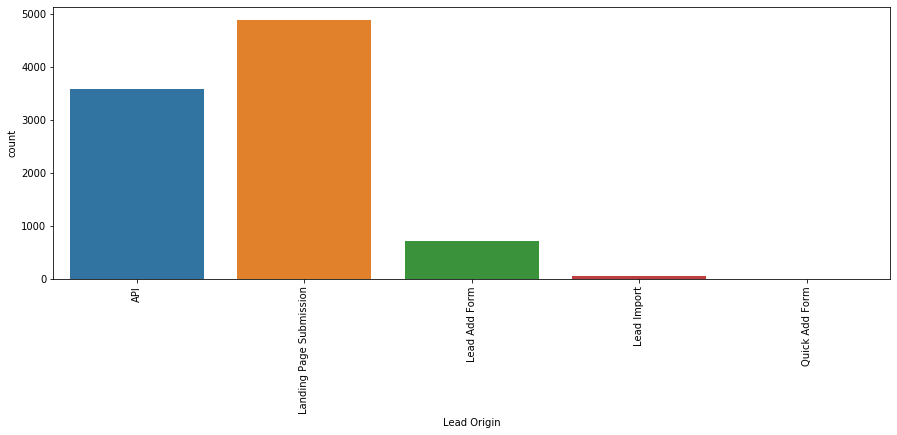

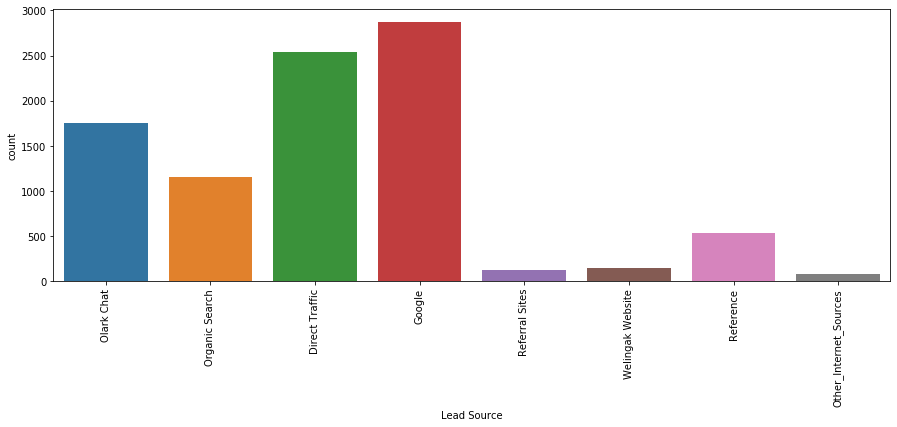

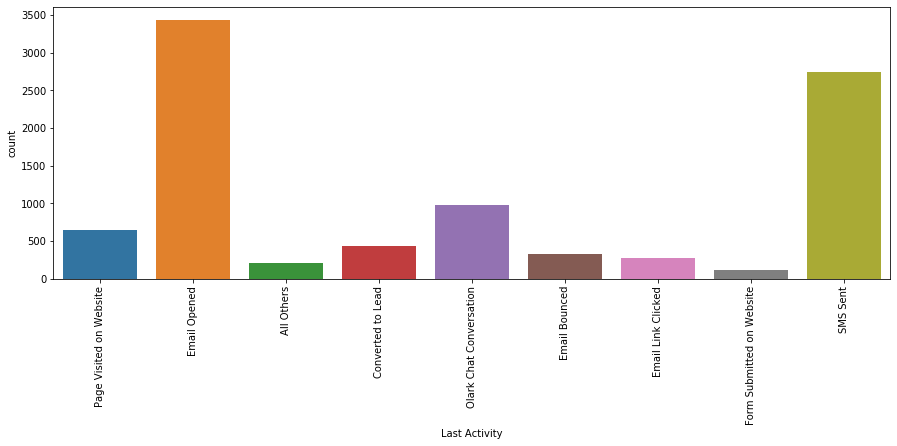

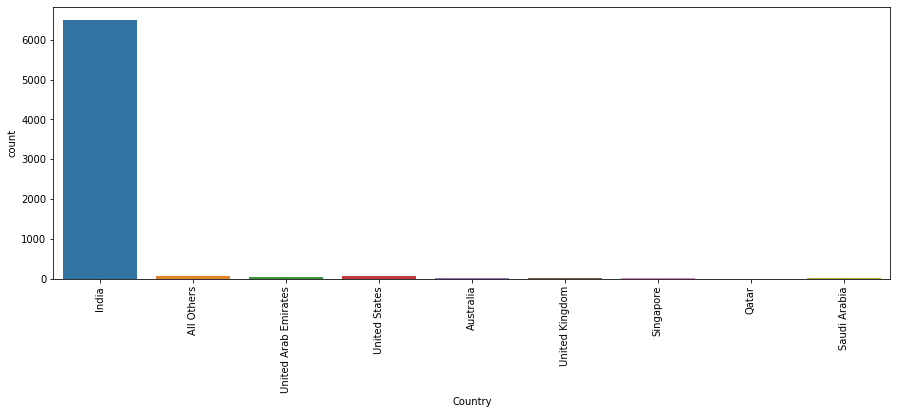

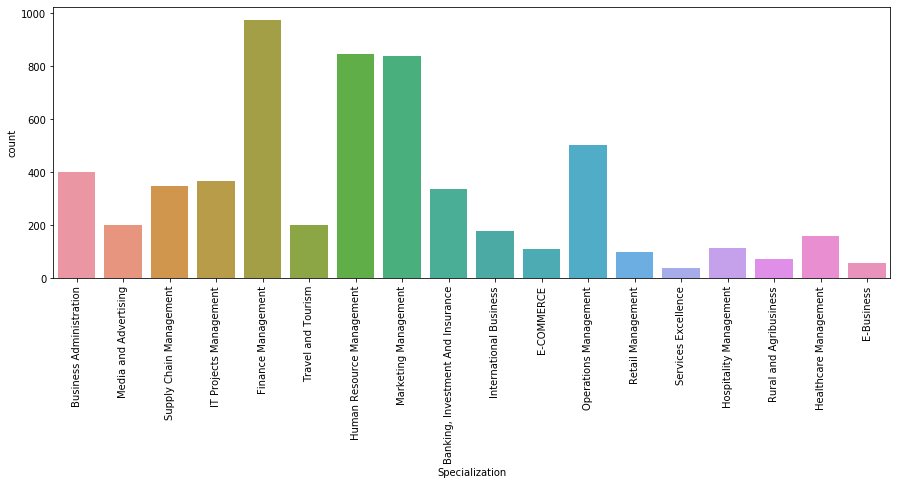

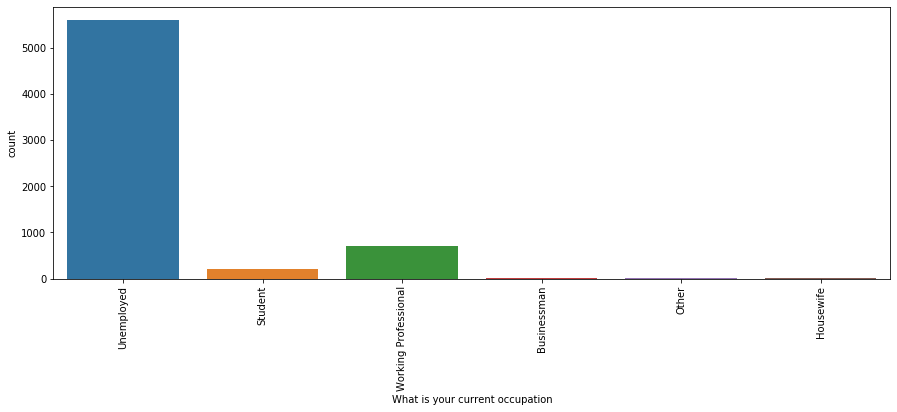

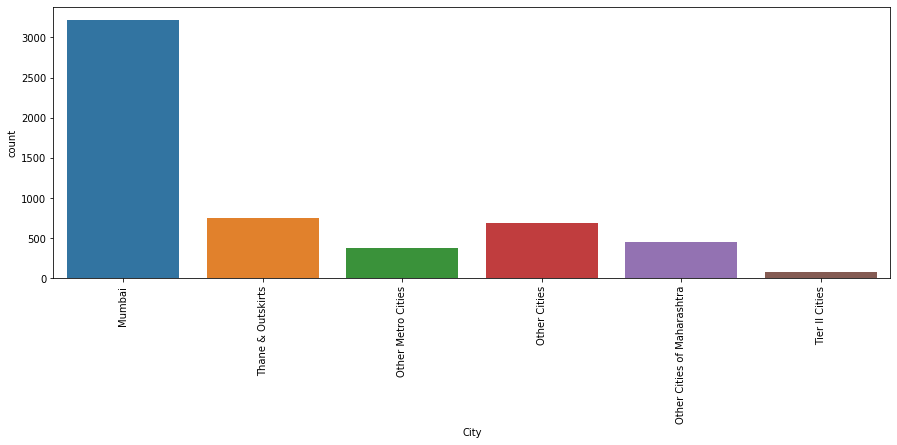

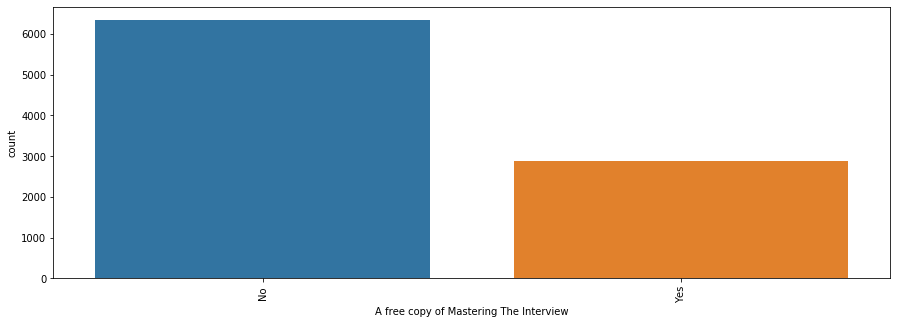

In [25]:
## Plotting

for i in ob:
    plt.figure(figsize=(15,5))
    sns.countplot(df[i])
    plt.xticks(rotation='vertical')
    

In [26]:
## checking the null values
100*df.isnull().sum()/len(df)


Lead Origin                                0.000000
Lead Source                                0.389610
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                   26.634199
Specialization                            36.580087
What is your current occupation           29.112554
City                                      39.707792
A free copy of Mastering The Interview     0.000000
dtype: float64

In [27]:
## chekcing the values counts of Country
df.Country.value_counts()

India                   6492
All Others                82
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Name: Country, dtype: int64

In [28]:
## chekcing the values counts of Specialization
df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [29]:
## Chekcing the value counts of City
df.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [30]:
# impute the mode for country, city, specialization and what is your current occupation with hightest value counts
df.loc[df['Specialization'].isnull(),'Specialization']=df['Specialization'].value_counts().index[0]
df.loc[df['City'].isnull(),'City']=df['City'].value_counts().index[0]
#df.loc[df['Specialization'].isnull(),'Specialization']="Unknown"
df.loc[df['Country'].isnull(),'Country']=df['Country'].value_counts().index[0]
df.loc[df['What is your current occupation'].isnull(),'What is your current occupation']=df['What is your current occupation'].value_counts().index[0]

In [31]:
df.City.value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [27]:
## checking the shape
df.shape


(9240, 12)

In [28]:
## checking the null values
100*df.isnull().sum()/len(df)

Lead Origin                               0.000000
Lead Source                               0.389610
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Last Activity                             1.114719
Country                                   0.000000
Specialization                            0.000000
What is your current occupation           0.000000
City                                      0.000000
A free copy of Mastering The Interview    0.000000
dtype: float64

In [29]:
## removing the remaining null values 
df=df.dropna()

In [30]:
## final check on null values 
round(100*(df.isnull().sum()/len(df))),2

(Lead Origin                               0.0
 Lead Source                               0.0
 Converted                                 0.0
 TotalVisits                               0.0
 Total Time Spent on Website               0.0
 Page Views Per Visit                      0.0
 Last Activity                             0.0
 Country                                   0.0
 Specialization                            0.0
 What is your current occupation           0.0
 City                                      0.0
 A free copy of Mastering The Interview    0.0
 dtype: float64, 2)

In [31]:
## checking integer and float datatypes
nu=df.select_dtypes(include=["int","float"]).columns
nu

Index(['TotalVisits', 'Page Views Per Visit'], dtype='object')

Imputation is done and moving to next step

### Outlier handling

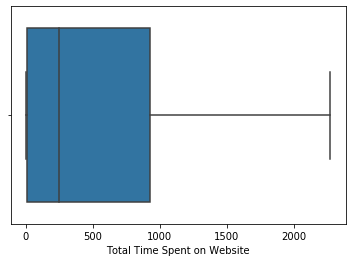

In [32]:
## Checking outlier in Total time spent
sns.boxplot(df["Total Time Spent on Website"])

In [33]:
df["Total Time Spent on Website"].value_counts()

0       2165
60        19
75        18
127       18
74        17
        ... 
1235       1
1091       1
1043       1
1035       1
1891       1
Name: Total Time Spent on Website, Length: 1717, dtype: int64

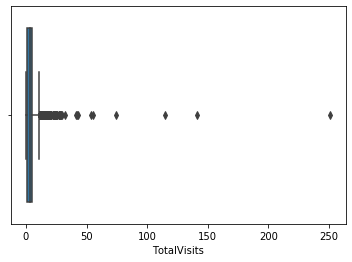

In [34]:
## checking outlier in Total Visits
sns.boxplot(df["TotalVisits"])

In [35]:
## checking the value counts
df["TotalVisits"].value_counts()

0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

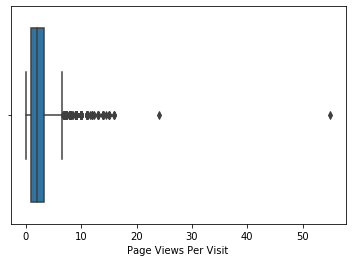

In [36]:
## chekcing outlier in page views per visit
sns.boxplot(df["Page Views Per Visit"])

In [37]:
## Outer range of ouliers are moving to .95 percentile
q4=df["TotalVisits"].quantile(q=.95)
df["TotalVisits"][df["TotalVisits"]>=q4]=q4

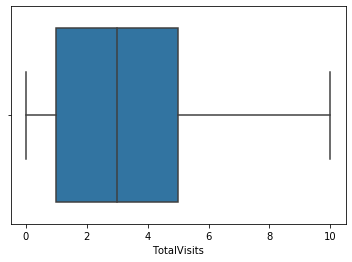

In [38]:
## checking after the coversion to upper range
sns.boxplot(df["TotalVisits"])

In [39]:
## converting to  q4 percentile
q4=df["Page Views Per Visit"].quantile(q=.95)
df["Page Views Per Visit"][df["Page Views Per Visit"]>=q4]=q4

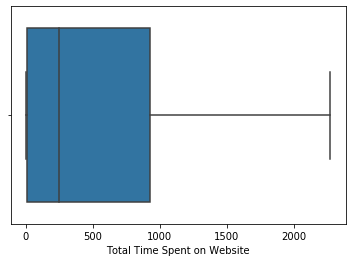

In [40]:
## checking after the coversion to upper range
sns.boxplot(df["Total Time Spent on Website"])


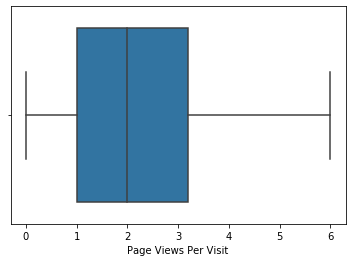

In [41]:
## checking after the coversion to upper range
sns.boxplot(df["Page Views Per Visit"])

In [42]:
## seeing the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
Country                                   9074 non-null object
Specialization                            9074 non-null object
What is your current occupation           9074 non-null object
City                                      9074 non-null object
A free copy of Mastering The Interview    9074 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 921.6+ KB


### Dummy variable handling

In [43]:
#dummy vaiables
df = pd.get_dummies(df,drop_first=True)

In [44]:
## checking the shape after adding the dummy variables
df.shape

(9074, 58)

In [45]:
## checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 58 columns):
Converted                                               9074 non-null int64
TotalVisits                                             9074 non-null float64
Total Time Spent on Website                             9074 non-null int64
Page Views Per Visit                                    9074 non-null float64
Lead Origin_Landing Page Submission                     9074 non-null uint8
Lead Origin_Lead Add Form                               9074 non-null uint8
Lead Origin_Lead Import                                 9074 non-null uint8
Lead Source_Google                                      9074 non-null uint8
Lead Source_Olark Chat                                  9074 non-null uint8
Lead Source_Organic Search                              9074 non-null uint8
Lead Source_Other_Internet_Sources                      9074 non-null uint8
Lead Source_Reference                                

### Correlation checking

In [46]:
## checking the correlation
df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Internet_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Australia,Country_India,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
Converted,1.000000,0.050742,0.359261,0.000329,-0.037481,0.300775,-0.009328,0.029960,-0.124085,-0.000581,-0.012254,0.255480,-0.031812,0.150027,-0.115775,-0.127327,-0.037746,-0.023051,-0.032183,-0.208619,-0.080999,0.335815,-0.011541,0.031996,-0.019076,-0.018676,0.008470,-0.000189,-0.003794,-0.021239,0.026549,-0.001661,-0.006241,-0.128626,0.029621,0.006161,0.049586,0.001674,-0.007621,0.067607,0.011600,0.044953,-0.008391,0.008560,-0.014207,0.020193,-0.008421,0.040372,0.018578,-0.006074,-0.281174,0.316246,0.012585,0.028551,0.012849,0.041365,-0.007612,-0.030860
TotalVisits,0.050742,1.000000,0.361207,0.766567,0.454350,-0.276775,-0.060592,0.216423,-0.504613,0.302834,-0.037144,-0.240579,0.090458,-0.129488,-0.103599,-0.066967,-0.031716,0.063875,0.021078,-0.221268,0.224804,0.023705,0.019392,-0.039845,-0.003487,0.007400,0.011881,0.029040,0.013778,0.006279,0.071805,0.031135,0.040638,-0.330924,0.051857,0.030542,0.091691,0.050722,0.062719,0.049837,0.072065,0.050292,0.045108,0.042147,0.027716,0.063664,0.099737,-0.008470,0.034267,-0.031805,0.011394,-0.001040,0.088596,0.065531,0.073821,0.098332,0.023270,0.296274
Total Time Spent on Website,0.359261,0.361207,1.000000,0.364735,0.292571,-0.188526,-0.050742,0.215390,-0.378626,0.100986,-0.037281,-0.162919,0.012533,-0.092049,-0.008747,-0.037249,-0.040418,0.008555,0.009261,-0.191431,0.030900,0.130375,0.012913,-0.028455,0.001615,0.005108,0.017693,0.009679,0.008636,0.009951,0.055358,0.019961,-0.001014,-0.239515,0.028897,0.036847,0.067162,0.034764,0.023108,0.068158,0.043215,0.062165,0.028783,0.021763,0.003529,0.050945,0.043377,0.006903,0.031444,-0.012423,-0.084584,0.096820,0.055615,0.069355,0.050121,0.076813,0.021938,0.177435
Page Views Per Visit,0.000329,0.766567,0.364735,1.000000,0.554142,-0.308881,-0.066440,0.261523,-0.579202,0.311582,-0.039385,-0.267668,0.079063,-0.144537,-0.066615,-0.040483,-0.042180,0.068452,0.015595,-0.264335,0.115595,0.082533,0.030168,-0.047515,0.011760,0.015054,0.006131,0.040026,0.020466,0.002600,0.067490,0.041164,0.046688,-0.377718,0.044464,0.037513,0.097286,0.073994,0.080554,0.068629,0.075888,0.063652,0.046557,0.029866,0.020921,0.074258,0.116568,-0.007611,0.020208,-0.036754,0.023001,-0.008830,0.101167,0.090136,0.101161,0.099137,0.032651,0.297421
Lead Origin_Landing Page

In [47]:
## checking the final statistics
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Internet_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Australia,Country_India,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.191867,482.887481,2.265943,0.538351,0.064029,0.003306,0.316068,0.193189,0.127177,0.006502,0.048821,0.013776,0.014216,0.047168,0.034384,0.029425,0.378223,0.012784,0.107119,0.070531,0.299317,0.001433,0.968371,0.001102,0.002314,0.002645,0.005841,0.001653,0.007604,0.043972,0.006282,0.012233,0.467379,0.017192,0.012233,0.092242,0.040335,0.019396,0.090699,0.022261,0.054992,0.011020,0.008045,0.004408,0.038131,0.022261,0.000992,0.001653,0.022702,0.899162,0.074609,0.074939,0.049151,0.041547,0.082103,0.008155,0.318272
std,0.485053,2.780618,545.256560,1.790991,0.498554,0.244818,0.057407,0.464965,0.394822,0.333189,0.080377,0.215505,0.116565,0.118389,0.212009,0.182223,0.169003,0.484971,0.112347,0.309282,0.256054,0.457984,0.037826,0.175019,0.033181,0.048054,0.051364,0.076206,0.040627,0.086874,0.205044,0.079012,0.109929,0.498962,0.129993,0.109929,0.289383,0.196755,0.137920,0.287196,0.147541,0.227978,0.104404,0.089337,0.066251,0.191523,0.147541,0.031480,0.040627,0.148961,0.301130,0.262774,0.263308,0.216196,0.199563,0.274536,0.089942,0.465831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

### Spliting the data in to Train and Test

In [48]:
# Importing the required library to perform the test_train_split
from sklearn.model_selection import train_test_split

In [49]:
X = df.drop(columns=['Converted'],axis=1)

#Putting the response variable in y
y = df[['Converted']]

In [50]:
# Performing the train_test_split with 70% of data for training set and 30% data for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 100)


In [51]:
## Statistics of Train dataset
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Internet_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Australia,Country_India,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,3.206267,484.344198,2.279180,0.535979,0.068651,0.003779,0.320107,0.186427,0.127224,0.007243,0.051645,0.013384,0.015903,0.044717,0.034640,0.028185,0.373799,0.011809,0.105338,0.070698,0.308298,0.001102,0.969296,0.000472,0.001889,0.002362,0.005826,0.001889,0.007400,0.040309,0.006456,0.011967,0.467171,0.017635,0.012282,0.094316,0.040938,0.019682,0.091324,0.022359,0.054795,0.011967,0.008818,0.003779,0.037632,0.021886,0.001102,0.001575,0.022201,0.898284,0.075894,0.074476,0.048181,0.041883,0.078885,0.008030,0.315383
std,2.787480,545.076458,1.801096,0.498743,0.252879,0.061362,0.466554,0.389482,0.333250,0.084803,0.221328,0.114920,0.125110,0.206699,0.182881,0.165513,0.483849,0.108035,0.307012,0.256339,0.461827,0.033184,0.172528,0.021731,0.043430,0.048545,0.076111,0.043430,0.085713,0.196698,0.080094,0.108744,0.498960,0.131631,0.110148,0.292291,0.198163,0.138916,0.288092,0.147859,0.227597,0.108744,0.093494,0.061362,0.190319,0.146324,0.033184,0.039653,0.147349,0.302299,0.264849,0.262565,0.214166,0.200338,0.269581,0.089258,0.464705
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,10.000000,

In [52]:
## checking the head 
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Internet_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Australia,Country_India,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
3009,2.0,397,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1012,2.0,190,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9226,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,2.0,1380,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
7987,5.0,1584,2.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


#### Scaling of the Train data set

In [53]:
# Importing the StandardScaler library from the sklearn
from sklearn.preprocessing import StandardScaler

# Selecting the columns which needs to be scaled.
col_scale = ['TotalVisits','Page Views Per Visit','Total Time Spent on Website' ]

# Creating an instance of StandardScaler() and scaling the columns in X_train
scaler = StandardScaler()
X_train[col_scale] = scaler.fit_transform(X_train[col_scale])


C:\Users\Prathima CN\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Prathima CN\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Modelling iteration with RFE and VIF 

In [54]:
import statsmodels.api as sm

In [55]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

C:\Users\Prathima CN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6293
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2654.1
Date:                Mon, 07 Sep 2020   Deviance:                       5308.2
Time:                        19:19:47   Pearson chi2:                 6.81e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3828      1.185      0.323      0.747      -1.940       2.706
TotalVisits                                              0.3608      0.055      6.563      0.000       0.253       0.469
Total Time Spent on Website                              1.1279      0.041     27.821      0.000       1.048       1.207
Page Views Per Visit                                    -0.3119      0.062     -5.050      0.000      -0.433      -0.191
Lead Origin_Landing Page Submission                     -0.4481      0.117     -3.820      0.000      -0.678      -0.218
Lead Origin_Lead Add Form                                2.0842      1.050      1.986      0.047       0.027       4.141
Lead Origin_Lead Import                                  1.1309      0.780      1.451      0.147      -0.397       2.659
Lead Source_Google                                       0.3193      0.113      2.818      0.005       0.097       0.541
Lead Source_Olark Chat                                   1.3507      0.165      8.179      0.000       1.027       1.674
Lead Source_Organic Search                               0.0932      0.131      0.713      0.476      -0.163       0.349
Lead Source_Other_Internet_Sources                       0.1730      0.623      0.278      0.781      -1.048       1.394
Lead Source_Reference                                    1.6523      1.072      1.542      0.123      -0.448       3.753
Lead Source_Referral Sites                              -0.1444      0.348     -0.415      0.678      -0.826       0.537
Lead Source_Welingak Website                             3.8814      1.278      3.038      0.002       1.377       6.385
Last Activity_Converted to Lead                         -1.7695      0.302     -5.850      0.000      -2.362      -1.177
Last Activity_Email Bounced                             -2.7386      0.429     -6.389      0.000      -3.579      -1.898
Last Activity_Email Link Clicked                        -0.9992      0.292     -3.419      0.001      -1.572      -0.426
Last Activity_Email Opened                              -0.5431      0.213     -2.553      0.011      -0.960      -0.126
Last Activity_Form Submitted on Website                 -1.2910      0.395     -3.272      0.001      -2.064      -0.518
Last Activity_Olark Chat Conversation                   -2.1580      0.260     -8.289      0.000      -2.668      -1.648
Last Activity_Page Visited on Website                   -1.2575      0.250     -5.035      0.000      -1.747      -0.768
Last Activity_SMS Sent                                   0.6205      0.213      2.909      0.004       0.202       1.039
Country_Australia                                       -0


### Feature Selection using RFE

In [56]:
# Importing the LogisticRegression library from sklearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [57]:

# Importing RFE library from sklearn
from sklearn.feature_selection import RFE

# Running RFE to select the top 20 features
rfe = RFE(logreg, 22)             
rfe = rfe.fit(X_train, y_train['Converted'])


C:\Users\Prathima CN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Prathima CN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Prathima CN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Prathima CN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Prathima CN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [58]:

# To check the ranking of each column in terms of being selected for LogReg model
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Other_Internet_Sources', False, 19),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', False, 18),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Country_Australia', False, 15),
 ('Country_India', False, 5),
 ('Country_Qatar', F

In [59]:
# Selecting all the 15 columns provided by RFE from X_train
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Services Excellence',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [60]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

C:\Users\Prathima CN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2699.8
Date:                Mon, 07 Sep 2020   Deviance:                       5399.7
Time:                        19:19:53   Pearson chi2:                 6.77e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2916      0.634      0.460      0.646      -0.951       1.535
Total Time Spent on Website                              1.1283      0.040     28.245      0.000       1.050       1.207
Lead Origin_Landing Page Submission                     -0.5861      0.104     -5.643      0.000      -0.790      -0.383
Lead Origin_Lead Add Form                                1.9513      0.899      2.171      0.030       0.189       3.713
Lead Origin_Lead Import                                  1.0463      0.469      2.230      0.026       0.127       1.966
Lead Source_Olark Chat                                   1.0835      0.120      9.056      0.000       0.849       1.318
Lead Source_Reference                                    1.5313      0.922      1.660      0.097      -0.276       3.339
Lead Source_Welingak Website                             3.7155      1.155      3.216      0.001       1.451       5.980
Last Activity_Converted to Lead                         -1.3720      0.222     -6.192      0.000      -1.806      -0.938
Last Activity_Email Bounced                             -2.2974      0.373     -6.166      0.000      -3.028      -1.567
Last Activity_Email Link Clicked                        -0.4557      0.211     -2.164      0.030      -0.869      -0.043
Last Activity_Form Submitted on Website                 -0.7610      0.338     -2.249      0.024      -1.424      -0.098
Last Activity_Olark Chat Conversation                   -1.6193      0.163     -9.914      0.000      -1.939      -1.299
Last Activity_Page Visited on Website                   -0.6139      0.146     -4.193      0.000      -0.901      -0.327
Last Activity_SMS Sent                                   1.0713      0.077     13.971      0.000       0.921       1.222
Specialization_Finance Management                       -0.4990      0.090     -5.546      0.000      -0.675      -0.323
Specialization_Hospitality Management                   -0.4485      0.323     -1.389      0.165      -1.081       0.184
Specialization_Services Excellence                      -0.6253      0.629     -0.994      0.320      -1.858       0.607
What is your current occupation_Housewife               21.8969   1.57e+04      0.001      0.999   -3.08e+04    3.08e+04
What is your current occupation_Student                 -0.4956      0.669     -0.741      0.459      -1.806       0.815
What is your current occupation_Unemployed              -0.9724      0.632     -1.538      0.124      -2.211       0.266
What is your current occupation_Working Professional     1.8081      0.658      2.749      0.006       0.519       3.097
City_Tier II Cities                                     -0

In [61]:
## Removing the column based on high P value
col = col.drop('What is your current occupation_Housewife')

In [62]:
## checking the summary after column removal
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.0
Date:                Mon, 07 Sep 2020   Deviance:                       5404.0
Time:                        19:19:53   Pearson chi2:                 6.78e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8197      0.575      1.425      0.154      -0.307       1.947
Total Time Spent on Website                              1.1274      0.040     28.241      0.000       1.049       1.206
Lead Origin_Landing Page Submission                     -0.5803      0.104     -5.594      0.000      -0.784      -0.377
Lead Origin_Lead Add Form                                1.9541      0.899      2.175      0.030       0.193       3.715
Lead Origin_Lead Import                                  1.0477      0.469      2.234      0.026       0.128       1.967
Lead Source_Olark Chat                                   1.0842      0.120      9.061      0.000       0.850       1.319
Lead Source_Reference                                    1.5373      0.922      1.667      0.095      -0.270       3.344
Lead Source_Welingak Website                             3.7137      1.155      3.215      0.001       1.450       5.978
Last Activity_Converted to Lead                         -1.3731      0.222     -6.198      0.000      -1.807      -0.939
Last Activity_Email Bounced                             -2.2989      0.373     -6.171      0.000      -3.029      -1.569
Last Activity_Email Link Clicked                        -0.4536      0.210     -2.158      0.031      -0.866      -0.042
Last Activity_Form Submitted on Website                 -0.7748      0.338     -2.291      0.022      -1.438      -0.112
Last Activity_Olark Chat Conversation                   -1.6223      0.163     -9.925      0.000      -1.943      -1.302
Last Activity_Page Visited on Website                   -0.6223      0.146     -4.250      0.000      -0.909      -0.335
Last Activity_SMS Sent                                   1.0694      0.077     13.951      0.000       0.919       1.220
Specialization_Finance Management                       -0.4963      0.090     -5.523      0.000      -0.672      -0.320
Specialization_Hospitality Management                   -0.4492      0.323     -1.392      0.164      -1.082       0.183
Specialization_Services Excellence                      -0.6261      0.629     -0.995      0.320      -1.859       0.607
What is your current occupation_Student                 -1.0278      0.611     -1.682      0.093      -2.226       0.170
What is your current occupation_Unemployed              -1.5037      0.571     -2.633      0.008      -2.623      -0.384
What is your current occupation_Working Professional     1.2763      0.599      2.129      0.033       0.102       2.451
City_Tier II Cities                                     -0.6206      0.429     -1.445      0.148      -1.462       0.221
==========================================================

In [63]:
## Removing the column based on high p value

col=col.drop("Specialization_Services Excellence")

In [64]:
## checking the statistics again
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.5
Date:                Mon, 07 Sep 2020   Deviance:                       5405.0
Time:                        19:19:54   Pearson chi2:                 6.78e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8194      0.575      1.425      0.154      -0.307       1.946
Total Time Spent on Website                              1.1278      0.040     28.252      0.000       1.050       1.206
Lead Origin_Landing Page Submission                     -0.5801      0.104     -5.594      0.000      -0.783      -0.377
Lead Origin_Lead Add Form                                1.9555      0.899      2.176      0.030       0.194       3.717
Lead Origin_Lead Import                                  1.0488      0.469      2.237      0.025       0.130       1.968
Lead Source_Olark Chat                                   1.0842      0.120      9.062      0.000       0.850       1.319
Lead Source_Reference                                    1.5324      0.922      1.662      0.096      -0.274       3.339
Lead Source_Welingak Website                             3.7135      1.155      3.215      0.001       1.449       5.977
Last Activity_Converted to Lead                         -1.3724      0.222     -6.195      0.000      -1.807      -0.938
Last Activity_Email Bounced                             -2.3065      0.372     -6.196      0.000      -3.036      -1.577
Last Activity_Email Link Clicked                        -0.4653      0.210     -2.211      0.027      -0.878      -0.053
Last Activity_Form Submitted on Website                 -0.7732      0.338     -2.287      0.022      -1.436      -0.110
Last Activity_Olark Chat Conversation                   -1.6245      0.163     -9.941      0.000      -1.945      -1.304
Last Activity_Page Visited on Website                   -0.6234      0.146     -4.259      0.000      -0.910      -0.337
Last Activity_SMS Sent                                   1.0674      0.077     13.933      0.000       0.917       1.218
Specialization_Finance Management                       -0.4924      0.090     -5.485      0.000      -0.668      -0.316
Specialization_Hospitality Management                   -0.4451      0.323     -1.379      0.168      -1.078       0.187
What is your current occupation_Student                 -1.0284      0.611     -1.683      0.092      -2.226       0.169
What is your current occupation_Unemployed              -1.5059      0.571     -2.637      0.008      -2.625      -0.387
What is your current occupation_Working Professional     1.2700      0.599      2.120      0.034       0.096       2.444
City_Tier II Cities                                     -0.6199      0.429     -1.445      0.149      -1.461       0.221
========================================================================================================================
"""

In [65]:
## Removing the column based on high p value
col=col.drop("Specialization_Hospitality Management")

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2703.5
Date:                Mon, 07 Sep 2020   Deviance:                       5406.9
Time:                        19:19:54   Pearson chi2:                 6.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8164      0.574      1.422      0.155      -0.309       1.942
Total Time Spent on Website                              1.1257      0.040     28.241      0.000       1.048       1.204
Lead Origin_Landing Page Submission                     -0.5795      0.104     -5.590      0.000      -0.783      -0.376
Lead Origin_Lead Add Form                                1.9570      0.898      2.179      0.029       0.196       3.718
Lead Origin_Lead Import                                  1.0504      0.469      2.241      0.025       0.132       1.969
Lead Source_Olark Chat                                   1.0818      0.120      9.045      0.000       0.847       1.316
Lead Source_Reference                                    1.5160      0.921      1.645      0.100      -0.290       3.322
Lead Source_Welingak Website                             3.7105      1.155      3.212      0.001       1.447       5.974
Last Activity_Converted to Lead                         -1.3741      0.222     -6.199      0.000      -1.808      -0.940
Last Activity_Email Bounced                             -2.3195      0.372     -6.229      0.000      -3.049      -1.590
Last Activity_Email Link Clicked                        -0.4646      0.210     -2.208      0.027      -0.877      -0.052
Last Activity_Form Submitted on Website                 -0.7650      0.338     -2.264      0.024      -1.427      -0.103
Last Activity_Olark Chat Conversation                   -1.6243      0.163     -9.943      0.000      -1.945      -1.304
Last Activity_Page Visited on Website                   -0.6181      0.146     -4.228      0.000      -0.905      -0.332
Last Activity_SMS Sent                                   1.0678      0.077     13.940      0.000       0.918       1.218
Specialization_Finance Management                       -0.4828      0.089     -5.397      0.000      -0.658      -0.307
What is your current occupation_Student                 -1.0380      0.610     -1.701      0.089      -2.234       0.158
What is your current occupation_Unemployed              -1.5116      0.570     -2.650      0.008      -2.630      -0.394
What is your current occupation_Working Professional     1.2574      0.599      2.101      0.036       0.084       2.430
City_Tier II Cities                                     -0.6229      0.431     -1.446      0.148      -1.467       0.221
========================================================================================================================
"""

In [67]:
## Removing the column based on high p value
col=col.drop("City_Tier II Cities")

In [68]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2704.6
Date:                Mon, 07 Sep 2020   Deviance:                       5409.1
Time:                        19:19:55   Pearson chi2:                 6.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8189      0.574      1.426      0.154      -0.307       1.945
Total Time Spent on Website                              1.1255      0.040     28.252      0.000       1.047       1.204
Lead Origin_Landing Page Submission                     -0.5844      0.104     -5.638      0.000      -0.788      -0.381
Lead Origin_Lead Add Form                                1.9578      0.898      2.180      0.029       0.198       3.718
Lead Origin_Lead Import                                  1.0501      0.468      2.241      0.025       0.132       1.968
Lead Source_Olark Chat                                   1.0810      0.120      9.041      0.000       0.847       1.315
Lead Source_Reference                                    1.5150      0.921      1.645      0.100      -0.291       3.321
Lead Source_Welingak Website                             3.7118      1.155      3.213      0.001       1.448       5.976
Last Activity_Converted to Lead                         -1.3783      0.221     -6.224      0.000      -1.812      -0.944
Last Activity_Email Bounced                             -2.3545      0.372     -6.326      0.000      -3.084      -1.625
Last Activity_Email Link Clicked                        -0.4660      0.210     -2.216      0.027      -0.878      -0.054
Last Activity_Form Submitted on Website                 -0.7606      0.338     -2.251      0.024      -1.423      -0.098
Last Activity_Olark Chat Conversation                   -1.6253      0.163     -9.950      0.000      -1.945      -1.305
Last Activity_Page Visited on Website                   -0.6223      0.146     -4.256      0.000      -0.909      -0.336
Last Activity_SMS Sent                                   1.0651      0.077     13.913      0.000       0.915       1.215
Specialization_Finance Management                       -0.4790      0.089     -5.355      0.000      -0.654      -0.304
What is your current occupation_Student                 -1.0378      0.610     -1.700      0.089      -2.234       0.159
What is your current occupation_Unemployed              -1.5153      0.570     -2.656      0.008      -2.633      -0.397
What is your current occupation_Working Professional     1.2504      0.598      2.089      0.037       0.077       2.423
========================================================================================================================
"""

In [69]:
 ## Removing the column based on high p value
col=col.drop("Lead Source_Reference")

In [70]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2705.7
Date:                Mon, 07 Sep 2020   Deviance:                       5411.4
Time:                        19:19:55   Pearson chi2:                 6.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8243      0.574      1.437      0.151      -0.300       1.949
Total Time Spent on Website                              1.1249      0.040     28.233      0.000       1.047       1.203
Lead Origin_Landing Page Submission                     -0.5856      0.104     -5.651      0.000      -0.789      -0.382
Lead Origin_Lead Add Form                                3.4095      0.229     14.870      0.000       2.960       3.859
Lead Origin_Lead Import                                  1.0483      0.469      2.237      0.025       0.130       1.967
Lead Source_Olark Chat                                   1.0779      0.120      9.009      0.000       0.843       1.312
Lead Source_Welingak Website                             2.2584      0.760      2.973      0.003       0.769       3.747
Last Activity_Converted to Lead                         -1.3785      0.221     -6.226      0.000      -1.812      -0.945
Last Activity_Email Bounced                             -2.3543      0.372     -6.326      0.000      -3.084      -1.625
Last Activity_Email Link Clicked                        -0.4621      0.210     -2.202      0.028      -0.874      -0.051
Last Activity_Form Submitted on Website                 -0.7588      0.338     -2.248      0.025      -1.420      -0.097
Last Activity_Olark Chat Conversation                   -1.6242      0.163     -9.945      0.000      -1.944      -1.304
Last Activity_Page Visited on Website                   -0.6248      0.146     -4.268      0.000      -0.912      -0.338
Last Activity_SMS Sent                                   1.0652      0.077     13.918      0.000       0.915       1.215
Specialization_Finance Management                       -0.4794      0.089     -5.361      0.000      -0.655      -0.304
What is your current occupation_Student                 -1.0395      0.610     -1.705      0.088      -2.234       0.155
What is your current occupation_Unemployed              -1.5194      0.570     -2.667      0.008      -2.636      -0.403
What is your current occupation_Working Professional     1.2480      0.598      2.088      0.037       0.076       2.420
========================================================================================================================
"""

In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,What is your current occupation_Unemployed,9.72
1,Lead Origin_Landing Page Submission,4.94
13,Specialization_Finance Management,3.21
4,Lead Source_Olark Chat,2.34
2,Lead Origin_Lead Add Form,1.91
12,Last Activity_SMS Sent,1.83
16,What is your current occupation_Working Profes...,1.73
10,Last Activity_Olark Chat Conversation,1.52
5,Lead Source_Welingak Website,1.35
0,Total Time Spent on Website,1.31


In [72]:
 ## Removing the column based on VIF more than 2 
col=col.drop("What is your current occupation_Student")

In [73]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2707.2
Date:                Mon, 07 Sep 2020   Deviance:                       5414.5
Time:                        19:19:56   Pearson chi2:                 6.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0622      0.226     -0.275      0.784      -0.506       0.382
Total Time Spent on Website                              1.1256      0.040     28.263      0.000       1.048       1.204
Lead Origin_Landing Page Submission                     -0.5942      0.103     -5.742      0.000      -0.797      -0.391
Lead Origin_Lead Add Form                                3.4127      0.229     14.888      0.000       2.963       3.862
Lead Origin_Lead Import                                  1.0442      0.469      2.228      0.026       0.126       1.963
Lead Source_Olark Chat                                   1.0722      0.120      8.969      0.000       0.838       1.307
Lead Source_Welingak Website                             2.2536      0.760      2.966      0.003       0.764       3.743
Last Activity_Converted to Lead                         -1.3822      0.221     -6.245      0.000      -1.816      -0.948
Last Activity_Email Bounced                             -2.3606      0.372     -6.344      0.000      -3.090      -1.631
Last Activity_Email Link Clicked                        -0.4622      0.209     -2.206      0.027      -0.873      -0.052
Last Activity_Form Submitted on Website                 -0.7403      0.338     -2.192      0.028      -1.402      -0.078
Last Activity_Olark Chat Conversation                   -1.6242      0.163     -9.956      0.000      -1.944      -1.304
Last Activity_Page Visited on Website                   -0.6173      0.146     -4.222      0.000      -0.904      -0.331
Last Activity_SMS Sent                                   1.0641      0.077     13.900      0.000       0.914       1.214
Specialization_Finance Management                       -0.4860      0.089     -5.440      0.000      -0.661      -0.311
What is your current occupation_Unemployed              -0.6242      0.204     -3.056      0.002      -1.024      -0.224
What is your current occupation_Working Professional     2.1428      0.274      7.832      0.000       1.607       2.679
========================================================================================================================
"""

In [74]:
## Removing the column based on high p value
col=col.drop("Last Activity_Form Submitted on Website")

In [75]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.8
Date:                Mon, 07 Sep 2020   Deviance:                       5419.7
Time:                        19:19:57   Pearson chi2:                 6.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0768      0.226     -0.340      0.734      -0.520       0.366
Total Time Spent on Website                              1.1246      0.040     28.258      0.000       1.047       1.203
Lead Origin_Landing Page Submission                     -0.5962      0.103     -5.769      0.000      -0.799      -0.394
Lead Origin_Lead Add Form                                3.4143      0.229     14.894      0.000       2.965       3.864
Lead Origin_Lead Import                                  1.0568      0.469      2.255      0.024       0.138       1.976
Lead Source_Olark Chat                                   1.0742      0.120      8.982      0.000       0.840       1.309
Lead Source_Welingak Website                             2.2558      0.760      2.969      0.003       0.767       3.745
Last Activity_Converted to Lead                         -1.3619      0.221     -6.160      0.000      -1.795      -0.929
Last Activity_Email Bounced                             -2.3410      0.372     -6.293      0.000      -3.070      -1.612
Last Activity_Email Link Clicked                        -0.4443      0.209     -2.123      0.034      -0.854      -0.034
Last Activity_Olark Chat Conversation                   -1.6099      0.163     -9.875      0.000      -1.929      -1.290
Last Activity_Page Visited on Website                   -0.5969      0.146     -4.090      0.000      -0.883      -0.311
Last Activity_SMS Sent                                   1.0832      0.076     14.227      0.000       0.934       1.232
Specialization_Finance Management                       -0.4802      0.089     -5.385      0.000      -0.655      -0.305
What is your current occupation_Unemployed              -0.6302      0.204     -3.091      0.002      -1.030      -0.231
What is your current occupation_Working Professional     2.1339      0.273      7.819      0.000       1.599       2.669
========================================================================================================================
"""

In [76]:
## Removing the column based on high p value
col=col.drop("What is your current occupation_Unemployed")

In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2714.5
Date:                Mon, 07 Sep 2020   Deviance:                       5429.0
Time:                        19:19:57   Pearson chi2:                 6.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6889      0.109     -6.307      0.000      -0.903      -0.475
Total Time Spent on Website                              1.1256      0.040     28.300      0.000       1.048       1.204
Lead Origin_Landing Page Submission                     -0.5897      0.103     -5.713      0.000      -0.792      -0.387
Lead Origin_Lead Add Form                                3.4392      0.229     15.014      0.000       2.990       3.888
Lead Origin_Lead Import                                  1.0430      0.468      2.228      0.026       0.125       1.961
Lead Source_Olark Chat                                   1.0805      0.120      9.039      0.000       0.846       1.315
Lead Source_Welingak Website                             2.2200      0.759      2.924      0.003       0.732       3.708
Last Activity_Converted to Lead                         -1.3724      0.221     -6.200      0.000      -1.806      -0.939
Last Activity_Email Bounced                             -2.3390      0.372     -6.284      0.000      -3.069      -1.609
Last Activity_Email Link Clicked                        -0.4464      0.209     -2.134      0.033      -0.856      -0.036
Last Activity_Olark Chat Conversation                   -1.6064      0.163     -9.863      0.000      -1.926      -1.287
Last Activity_Page Visited on Website                   -0.5993      0.146     -4.110      0.000      -0.885      -0.313
Last Activity_SMS Sent                                   1.0669      0.076     14.070      0.000       0.918       1.216
Specialization_Finance Management                       -0.4790      0.089     -5.374      0.000      -0.654      -0.304
What is your current occupation_Working Professional     2.7447      0.189     14.543      0.000       2.375       3.115
========================================================================================================================
"""

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.95
12,Specialization_Finance Management,1.93
11,Last Activity_SMS Sent,1.66
1,Lead Origin_Landing Page Submission,1.65
2,Lead Origin_Lead Add Form,1.62
9,Last Activity_Olark Chat Conversation,1.46
5,Lead Source_Welingak Website,1.35
0,Total Time Spent on Website,1.29
13,What is your current occupation_Working Profes...,1.18
10,Last Activity_Page Visited on Website,1.14


In [79]:
## Removing the column based on high p value
col=col.drop("Last Activity_Email Link Clicked")

In [80]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2716.9
Date:                Mon, 07 Sep 2020   Deviance:                       5433.8
Time:                        19:19:58   Pearson chi2:                 6.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7146      0.109     -6.583      0.000      -0.927      -0.502
Total Time Spent on Website                              1.1260      0.040     28.330      0.000       1.048       1.204
Lead Origin_Landing Page Submission                     -0.5895      0.103     -5.715      0.000      -0.792      -0.387
Lead Origin_Lead Add Form                                3.4284      0.229     14.989      0.000       2.980       3.877
Lead Origin_Lead Import                                  1.0628      0.469      2.268      0.023       0.144       1.981
Lead Source_Olark Chat                                   1.0691      0.119      8.966      0.000       0.835       1.303
Lead Source_Welingak Website                             2.2247      0.759      2.930      0.003       0.737       3.713
Last Activity_Converted to Lead                         -1.3480      0.221     -6.096      0.000      -1.781      -0.915
Last Activity_Email Bounced                             -2.3119      0.372     -6.215      0.000      -3.041      -1.583
Last Activity_Olark Chat Conversation                   -1.5744      0.162     -9.704      0.000      -1.892      -1.256
Last Activity_Page Visited on Website                   -0.5738      0.145     -3.947      0.000      -0.859      -0.289
Last Activity_SMS Sent                                   1.0939      0.075     14.602      0.000       0.947       1.241
Specialization_Finance Management                       -0.4780      0.089     -5.365      0.000      -0.653      -0.303
What is your current occupation_Working Professional     2.7486      0.189     14.559      0.000       2.379       3.119
========================================================================================================================
"""

In [81]:
col=col.drop('Lead Origin_Lead Import')

In [82]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2719.2
Date:                Mon, 07 Sep 2020   Deviance:                       5438.4
Time:                        19:19:59   Pearson chi2:                 6.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6799      0.107     -6.336      0.000      -0.890      -0.470
Total Time Spent on Website                              1.1180      0.040     28.301      0.000       1.041       1.195
Lead Origin_Landing Page Submission                     -0.6169      0.102     -6.027      0.000      -0.818      -0.416
Lead Origin_Lead Add Form                                3.3930      0.228     14.881      0.000       2.946       3.840
Lead Source_Olark Chat                                   1.0379      0.118      8.785      0.000       0.806       1.269
Lead Source_Welingak Website                             2.2289      0.759      2.936      0.003       0.741       3.717
Last Activity_Converted to Lead                         -1.3562      0.221     -6.141      0.000      -1.789      -0.923
Last Activity_Email Bounced                             -2.3160      0.372     -6.228      0.000      -3.045      -1.587
Last Activity_Olark Chat Conversation                   -1.5812      0.162     -9.752      0.000      -1.899      -1.263
Last Activity_Page Visited on Website                   -0.5803      0.145     -3.998      0.000      -0.865      -0.296
Last Activity_SMS Sent                                   1.0893      0.075     14.559      0.000       0.943       1.236
Specialization_Finance Management                       -0.4862      0.089     -5.459      0.000      -0.661      -0.312
What is your current occupation_Working Professional     2.7523      0.189     14.586      0.000       2.382       3.122
========================================================================================================================
"""

In [83]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.92
10,Specialization_Finance Management,1.91
9,Last Activity_SMS Sent,1.63
2,Lead Origin_Lead Add Form,1.62
1,Lead Origin_Landing Page Submission,1.60
7,Last Activity_Olark Chat Conversation,1.44
4,Lead Source_Welingak Website,1.35
0,Total Time Spent on Website,1.29
11,What is your current occupation_Working Profes...,1.18
8,Last Activity_Page Visited on Website,1.14


### Model looks good with 12 features and moving to Prediction

In [84]:
# Finding the probability value using res.predict()
y_train_pred = res.predict(X_train_sm)

#reshaping the y_train_pred
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1232289 , 0.12450217, 0.49189861, 0.83613527, 0.82664379,
       0.5820641 , 0.05905816, 0.92675961, 0.85409302, 0.79956268])

In [85]:
y_train_pred_final = pd.DataFrame({'Converted':y_train['Converted'].values, 'Score':y_train_pred*100})
y_train_pred_final.head()

,Converted,Score
0,0,12.322890
1,0,12.450217
2,0,49.189861
3,1,83.613527
4,1,82.664379


Finding Optimal Cut-off point.Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [86]:
from sklearn import metrics

In [87]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)*10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Score,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0
0,0,12.322890,1,1,0,0,0,0,0,0,0,0
1,0,12.450217,1,1,0,0,0,0,0,0,0,0
2,0,49.189861,1,1,1,1,1,0,0,0,0,0
3,1,83.613527,1,1,1,1,1,1,1,1,1,0
4,1,82.664379,1,1,1,1,1,1,1,1,1,0


In [88]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.0    0.0  0.385136  1.000000  0.000000
10.0  10.0  0.585892  0.970564  0.344942
20.0  20.0  0.713274  0.918234  0.584891
30.0  30.0  0.793103  0.829109  0.770551
40.0  40.0  0.811841  0.762469  0.842766
50.0  50.0  0.803653  0.659853  0.893726
60.0  60.0  0.789797  0.585854  0.917542
70.0  70.0  0.776256  0.505315  0.945967
80.0  80.0  0.748229  0.392886  0.970807
90.0  90.0  0.705401  0.254293  0.987964


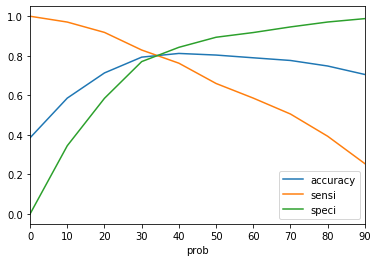

In [89]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Optimal Cutoff is coming as 32 percentage

In [90]:
# Creating a new column 'predicted' which will be our model's prediction whether lead converted or not.
y_train_pred_final['predicted'] = y_train_pred_final.Score.map( lambda x: 1 if x > 32 else 0)

y_train_pred_final.sort_values(by = ['Score'], ascending = [False]).head(20)
                                     

,Converted,Score,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,predicted
5871,1,99.902805,1,1,1,1,1,1,1,1,1,1,1
5971,1,99.867621,1,1,1,1,1,1,1,1,1,1,1
3687,1,99.853901,1,1,1,1,1,1,1,1,1,1,1
4242,1,99.833451,1,1,1,1,1,1,1,1,1,1,1
4773,1,99.790525,1,1,1,1,1,1,1,1,1,1,1
5270,1,99.780361,1,1,1,1,1,1,1,1,1,1,1
5043,1,99.748142,1,1,1,1,1,1,1,1,1,1,1
1903,1,99.735404,1,1,1,1,1,1,1,1,1,1,1
2980,1,99.734381,1,1,1,1,1,1,1,1,1,1,1
4442,1,99.728891,1,1,1,1,1,1,1,1,1,1,1


In [91]:
# Let's check the overall accuracy of our model on train set.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7995591245473154

#### Building the ROC Curve

In [92]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [93]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Score, drop_intermediate = False )


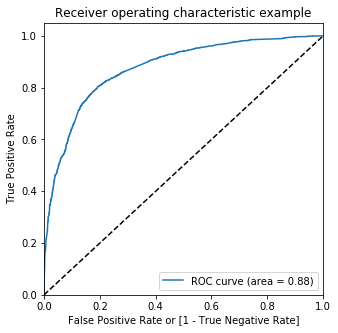

In [94]:
## Curve building
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Score'])

In [95]:
## creating the confusion metrices
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3078,  827],
       [ 446, 2000]], dtype=int64)

In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity

0.8176614881439084

In [98]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.7882202304737516

In [99]:
# Let's check the overall accuracy of our model on train set.
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
accuracy

0.7995591245473154

In [100]:
# Let's check the overall precision of our model on train set.
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision


0.7074637424831978

In [101]:
# Let's check the overall recall of our model on train set.
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
recall


0.8176614881439084

In [102]:
pd.options.display.float_format = '{:.2f}'.format
new_params= round(res.params.sort_values(ascending=False),2)
new_params

Lead Origin_Lead Add Form                               3.39
What is your current occupation_Working Professional    2.75
Lead Source_Welingak Website                            2.23
Total Time Spent on Website                             1.12
Last Activity_SMS Sent                                  1.09
Lead Source_Olark Chat                                  1.04
Specialization_Finance Management                      -0.49
Last Activity_Page Visited on Website                  -0.58
Lead Origin_Landing Page Submission                    -0.62
const                                                  -0.68
Last Activity_Converted to Lead                        -1.36
Last Activity_Olark Chat Conversation                  -1.58
Last Activity_Email Bounced                            -2.32
dtype: float64

In [103]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance.sort_values(ascending=False)

Lead Origin_Lead Add Form                              100.00
What is your current occupation_Working Professional    81.12
Lead Source_Welingak Website                            65.78
Total Time Spent on Website                             33.04
Last Activity_SMS Sent                                  32.15
Lead Source_Olark Chat                                  30.68
Specialization_Finance Management                      -14.45
Last Activity_Page Visited on Website                  -17.11
Lead Origin_Landing Page Submission                    -18.29
const                                                  -20.06
Last Activity_Converted to Lead                        -40.12
Last Activity_Olark Chat Conversation                  -46.61
Last Activity_Email Bounced                            -68.44
dtype: float64

In [104]:
#Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Lead Origin_Lead Add Form                               12
What is your current occupation_Working Professional    11
Lead Source_Welingak Website                            10
Total Time Spent on Website                              9
Last Activity_SMS Sent                                   8
Lead Source_Olark Chat                                   7
Specialization_Finance Management                        6
Last Activity_Page Visited on Website                    5
Lead Origin_Landing Page Submission                      4
const                                                    3
Last Activity_Converted to Lead                          2
Last Activity_Olark Chat Conversation                    1
Last Activity_Email Bounced                              0
dtype: int64

### Prediction on Test dataset

In [105]:
## Checking the head
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Internet_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Australia,Country_India,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
3271,4.00,157,4.00,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1490,5.00,1513,5.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7936,2.00,74,2.00,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4216,0.00,0,0.00,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3830,8.00,164,6.00,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [106]:
y_test.head()

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0


In [107]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Internet_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Australia,Country_India,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
3271,4.00,157,4.00,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1490,5.00,1513,5.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7936,2.00,74,2.00,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4216,0.00,0,0.00,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3830,8.00,164,6.00,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [108]:
#Scaling the columns from col_scale list in X_test
X_test[col_scale] = scaler.transform(X_test[col_scale])

#Selecting the features present in col list.
X_test = X_test[col]
X_test.head()

C:\Users\Prathima CN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Prathima CN\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Finance Management,What is your current occupation_Working Professional
3271,-0.60,0,0,0,0,0,0,0,0,0,1,0
1490,1.89,1,0,0,0,0,0,0,0,0,0,1
7936,-0.75,0,0,0,0,0,0,0,0,0,1,0
4216,-0.89,0,1,0,0,0,0,0,0,0,0,0
3830,-0.59,1,0,0,0,0,0,0,0,0,0,0


In [109]:
#Adding constant variable to the X_test
X_test_sm = sm.add_constant(X_test)

#Storing the values predicted by our model
y_test_pred = res.predict(X_test_sm)
y_test_pred.sort_values(ascending = [False]).head(20)

C:\Users\Prathima CN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


2378   1.00
2495   1.00
2011   1.00
4613   1.00
1578   1.00
446    1.00
8106   1.00
2763   1.00
1568   1.00
5785   1.00
8088   1.00
5804   1.00
8052   1.00
2680   1.00
5805   1.00
2650   1.00
2673   1.00
5797   1.00
8113   1.00
3723   1.00
dtype: float64

In [110]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test, y_pred_1*100],axis=1)

In [111]:
## Y test pred final
y_pred_final.head(20)

,Converted,0
3271,0,13.73
1490,1,97.25
7936,0,11.84
4216,1,84.81
3830,0,12.41
1800,1,64.97
6507,0,28.16
4821,0,20.14
4223,1,91.07
4714,0,49.19


In [112]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Score'})

In [113]:
# Predicting the lead conversion based on Score values
y_pred_final['predicted'] = y_pred_final.Score.map(lambda x: 1 if x > 32 else 0)

In [114]:
y_pred_final.head()

,Converted,Score,predicted
3271,0,13.73,0
1490,1,97.25,1
7936,0,11.84,0
4216,1,84.81,1
3830,0,12.41,0


In [115]:
# Let's check the overall accuracy.
accuracy = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)
accuracy

0.8031582813073815

In [116]:
#Creating the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )
confusion2

array([[1382,  352],
       [ 184,  805]], dtype=int64)

In [117]:
#Calculating True Positive, True Negative, False Positive and False Negative
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [118]:
# Calculating sensitivity  of test dataset
sensitivity = TP / float(TP+FN) #also called recall
sensitivity

0.813953488372093

In [119]:
# Calculating specificity of test dataset
specificity = TN / float(TN+FP)
specificity

0.7970011534025375

In [120]:
# Calculating Precision of test dataset
precision = TP/(FP+TP)
precision

0.6957649092480553

In [121]:
# Calculating Recall of test dataset
recall = confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])
recall

0.813953488372093

Summary
Top Twelve Features are ,

Lead Origin_Lead Add Form                               
What is your current occupation_Working Professional    
Lead Source_Welingak Website                            
Total Time Spent on Website                             
Last Activity_SMS Sent                                 
Lead Source_Olark Chat                                  
Specialization_Finance Management                      
Last Activity_Page Visited on Website                  
Lead Origin_Landing Page Submission                                                                   
Last Activity_Converted to Lead                        
Last Activity_Olark Chat Conversation                  
Last Activity_Email Bounced 

ROC value is .88

Variables Train Model Test Model

Sensitivity 81.76% 81.39%

Specificity 78.82% 79.70%

Precision 70.74% 69.57%

Recall 81.76% 81.39%

Accuracy 79.95% 80.32%
